In [28]:
from utils.Dataloader import load_movies,load_ratings,load_users
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
movies_df = load_movies('datasets/')
ratings_df = load_ratings('datasets/')
users_df = load_users('datasets/')

In [29]:
display(movies_df)
display(ratings_df)
display(users_df)

,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


,userId,gender,age,Occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


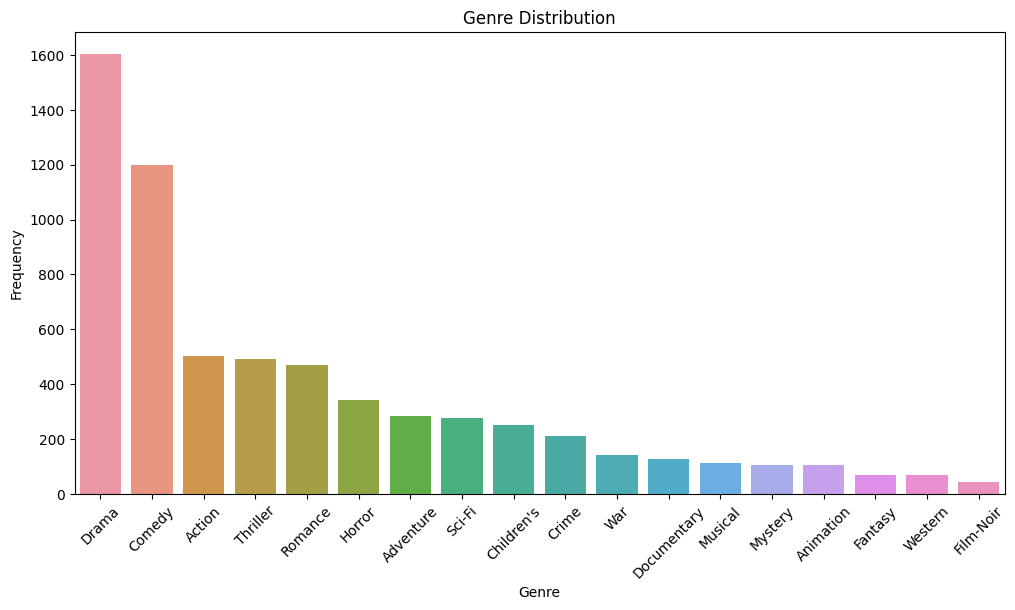

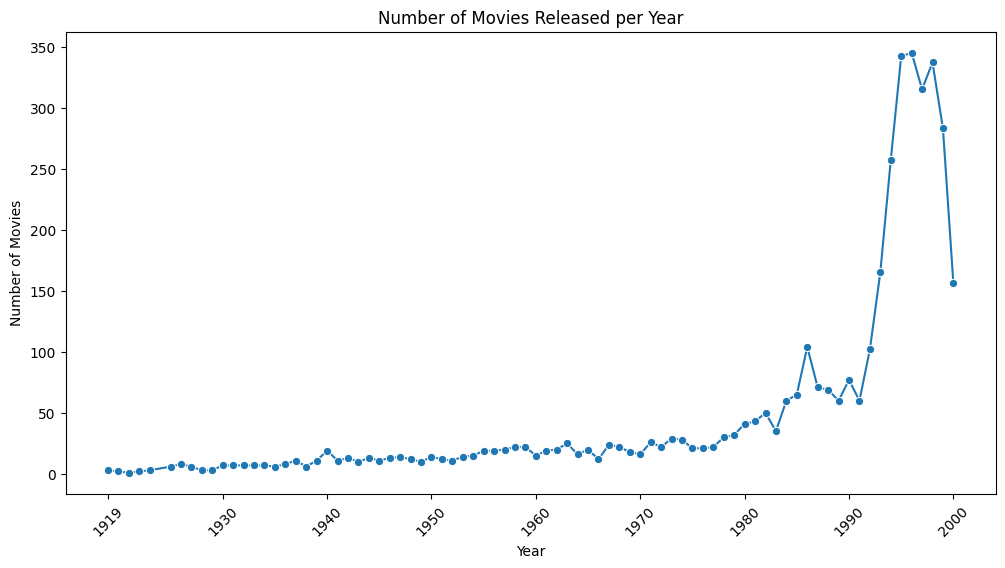

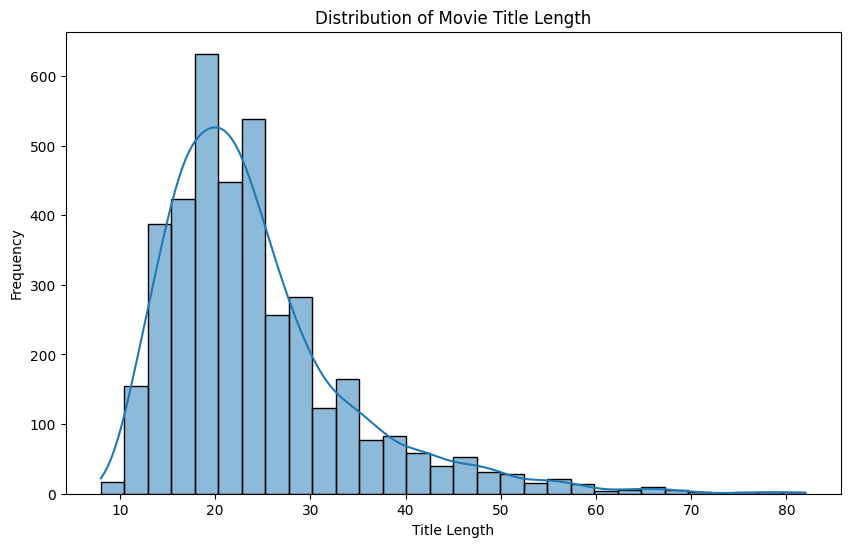

In [31]:

# 1. 장르 분포
genres = movies_df['genres'].str.split('|', expand=True).stack()
genre_counts = genres.value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Extracting year information
movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)')

# Converting year to numeric
movies_df['year'] = pd.to_numeric(movies_df['year'])

# Counting movies per year
yearly_movie_counts = movies_df['year'].value_counts().sort_index()

# Get the x values as 10-year intervals
x_values = yearly_movie_counts.index[::10]

# Visualization using line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_movie_counts.index, y=yearly_movie_counts.values, marker="o")
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(x_values, x_values, rotation=45)
plt.show()

# 3. 영화 제목 길이 분포
movies_df['title_length'] = movies_df['title'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=movies_df, x='title_length', bins=30, kde=True)
plt.title('Distribution of Movie Title Length')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.show()

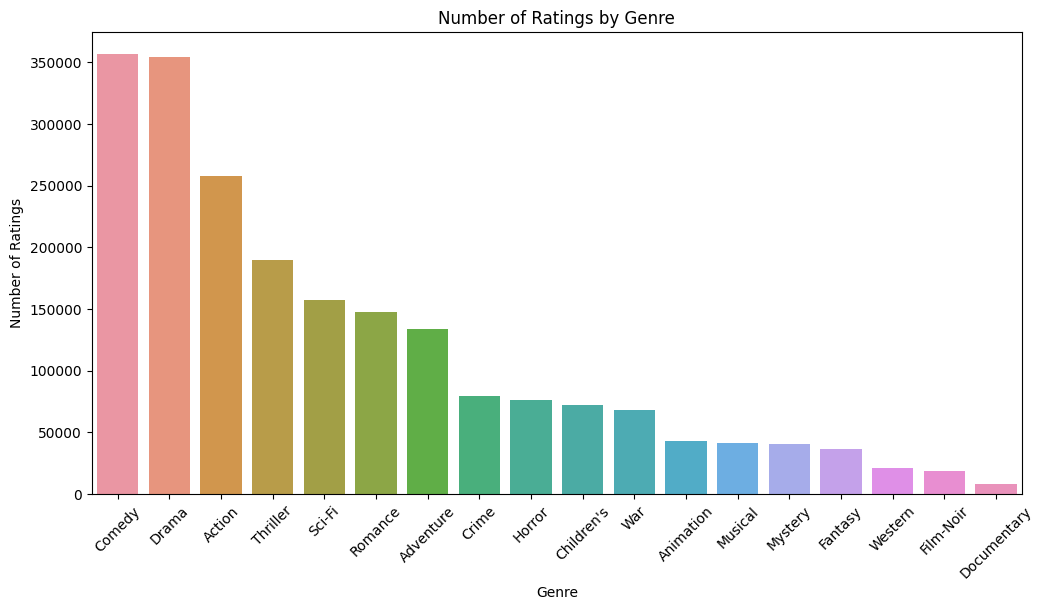

In [32]:
# movieId를 기준으로 movies_df와 ratings_df를 병합
merged_df = ratings_df.merge(movies_df, on='movieId')

# '|'로 구분된 장르를 분리
genres_split = merged_df['genres'].str.split('|', expand=True)

# 장르 정보를 확장한 데이터프레임과 ratings 정보 병합
merged_genres_ratings = pd.concat([merged_df, genres_split], axis=1)

# 장르 컬럼의 이름을 'genre1', 'genre2', ... 로 변경
merged_genres_ratings.columns = list(merged_df.columns) + ['genre' + str(i+1) for i in range(genres_split.shape[1])]

# 장르 열들을 'genre' 열로 unpivot
melted_genres_ratings = pd.melt(merged_genres_ratings, id_vars=['movieId', 'userId', 'rating'], value_vars=['genre1', 'genre2', 'genre3', 'genre4', 'genre5'], value_name='genre')

# 별점 평균과 별점 수 계산
genre_ratings_stats = melted_genres_ratings.groupby('genre').agg({'rating': ['mean', 'count']})
# 별점 수 기준으로 장르 정렬
genre_ratings_stats = genre_ratings_stats.sort_values(('rating', 'count'), ascending=False)
# 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_ratings_stats.index, y=genre_ratings_stats[('rating', 'count')])
plt.title('Number of Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()

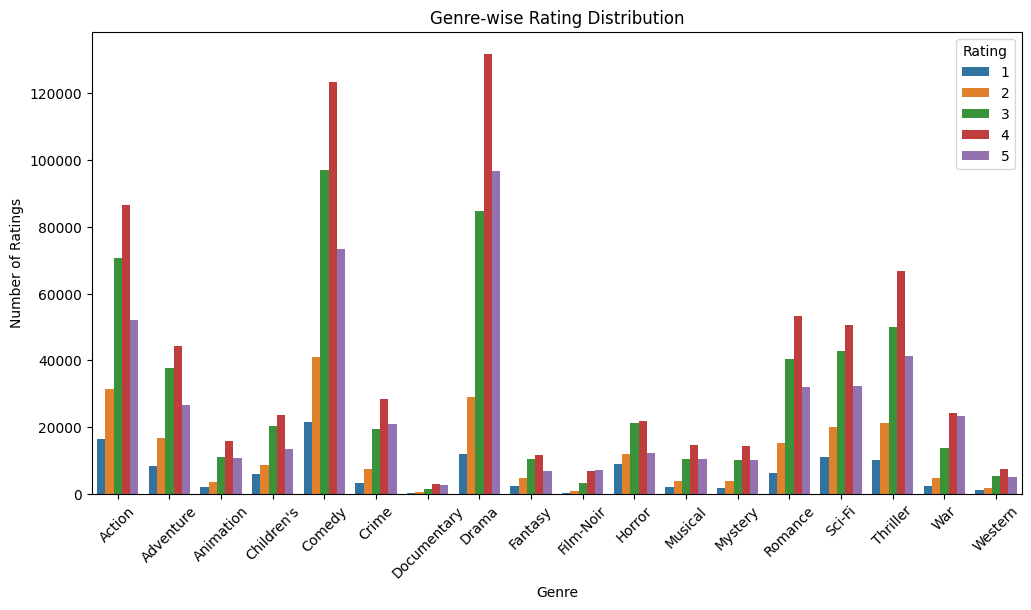

In [25]:
# Merge movies_df and ratings_df based on 'movieId'
merged_df = ratings_df.merge(movies_df, on='movieId')

# Split genres and create a new row for each genre
genre_split = merged_df['genres'].str.split('|', expand=True)
genre_df = pd.concat([merged_df, genre_split], axis=1)

# Melt the dataframe to create 'genre' column
melted_genre_df = pd.melt(genre_df, id_vars=['movieId', 'rating'], value_vars=list(genre_split.columns), value_name='genre')

# Count ratings for each genre and rating
genre_rating_count = melted_genre_df.groupby(['genre', 'rating']).size().reset_index(name='count')

# Plotting the genre-wise rating distribution using grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_rating_count, x='genre', y='count', hue='rating')
plt.title('Genre-wise Rating Distribution')
plt.xlabel('Genre')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.legend(title='Rating')
plt.show()

In [34]:
user_rating_counts.min()

20

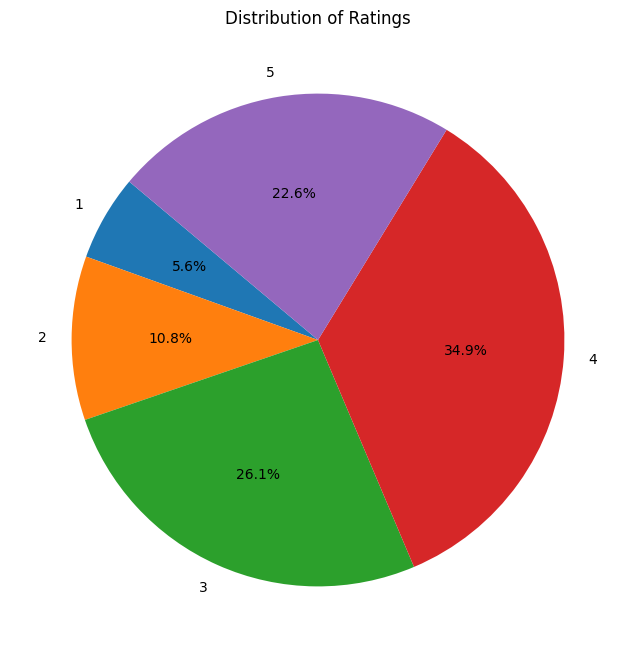

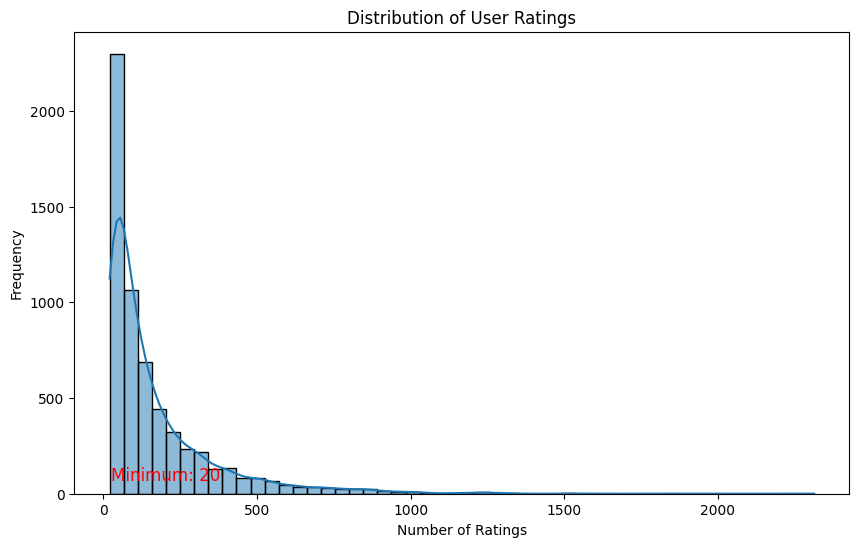

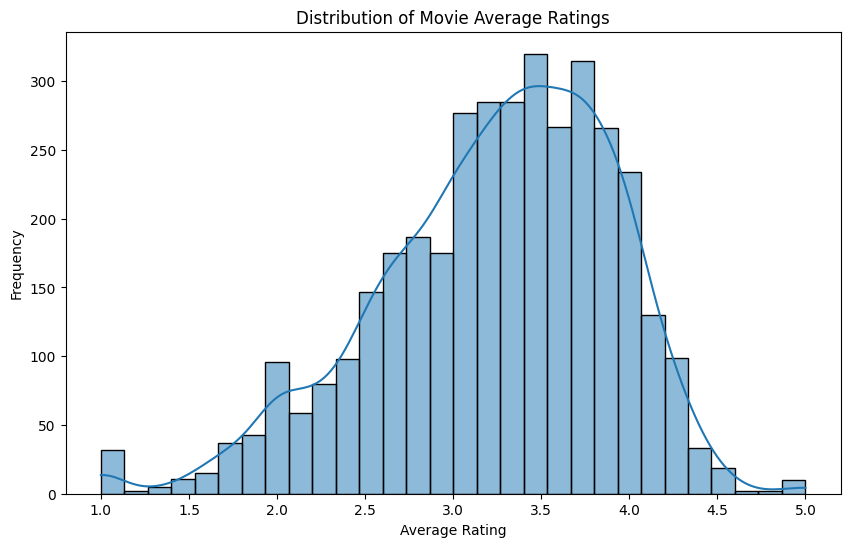

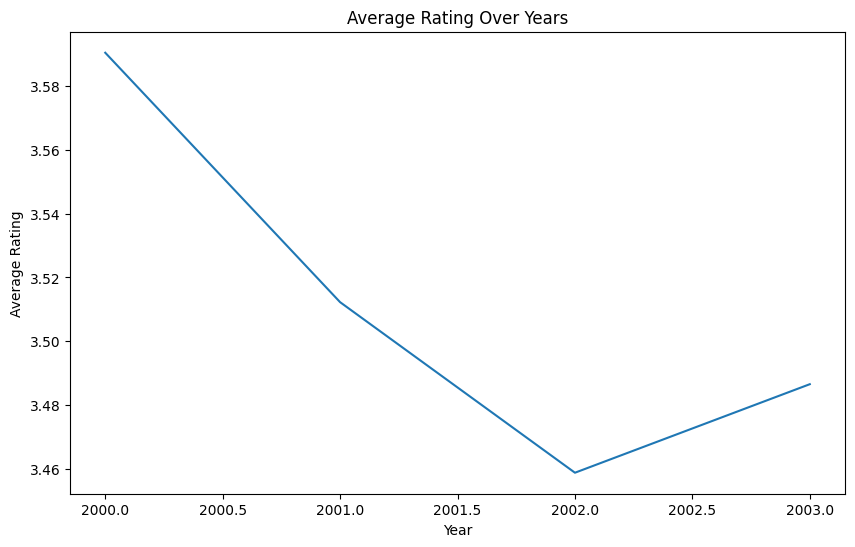

In [39]:
# Count the occurrences of each rating
rating_counts = ratings_df['rating'].value_counts()

# Sort the index for plotting
sorted_index = sorted(rating_counts.index)

# Plotting a pie chart for rating distribution
plt.figure(figsize=(8, 8))
plt.pie(rating_counts[sorted_index], labels=sorted_index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ratings')
plt.show()

# 2. 사용자별 평점 수
# Calculate user rating counts
user_rating_counts = ratings_df['userId'].value_counts()

# Plotting the distribution of user ratings
plt.figure(figsize=(10, 6))
sns.histplot(data=user_rating_counts, bins=50, kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')

# Displaying the minimum value as text
min_count = user_rating_counts.min()
plt.text(min_count + 5, 70, f'Minimum: {min_count}', color='red', fontsize=12)

plt.show()

# 3. 영화별 평점 평균
movie_avg_ratings = ratings_df.groupby('movieId')['rating'].mean()
plt.figure(figsize=(10, 6))
sns.histplot(data=movie_avg_ratings, bins=30, kde=True)
plt.title('Distribution of Movie Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

# 4. 시간에 따른 평점 변화
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit='s')
ratings_df['year'] = ratings_df['timestamp'].dt.year

avg_rating_by_year = ratings_df.groupby('year')['rating'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_rating_by_year)
plt.title('Average Rating Over Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()


In [5]:
# timestamp의 범위 계산
min_timestamp = ratings_df["timestamp"].min()
max_timestamp = ratings_df["timestamp"].max()

# 리뷰 수 계산
review_counts = ratings_df.groupby(pd.cut(ratings_df["timestamp"], bins=5)).size()

print("Timestamp Range:")
print("Min Timestamp:", min_timestamp)
print("Max Timestamp:", max_timestamp)

Timestamp Range:
Min Timestamp: 2000-04-25 23:05:32
Max Timestamp: 2003-02-28 17:49:50


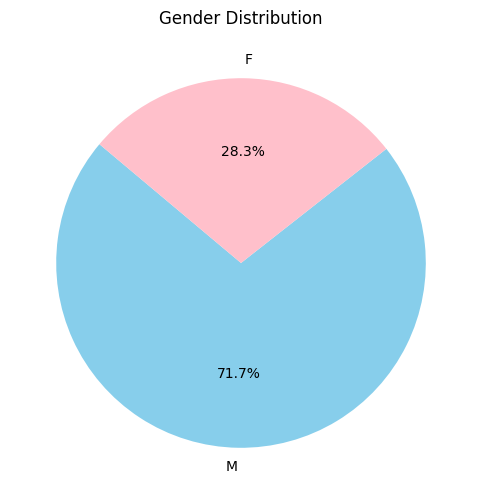

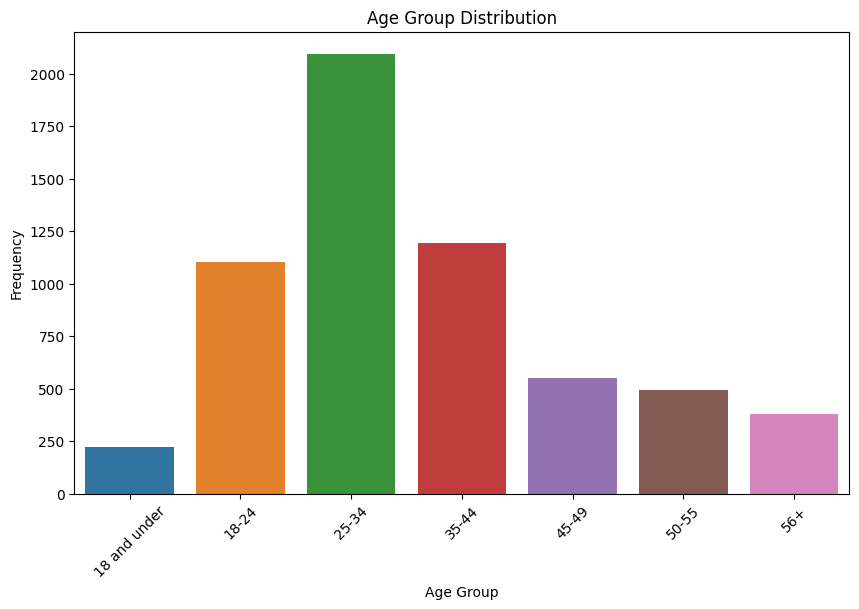

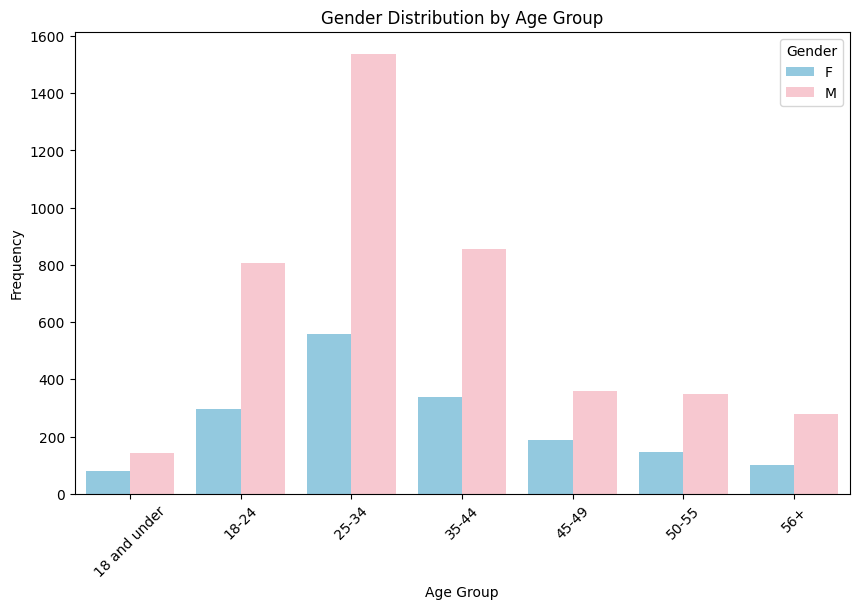

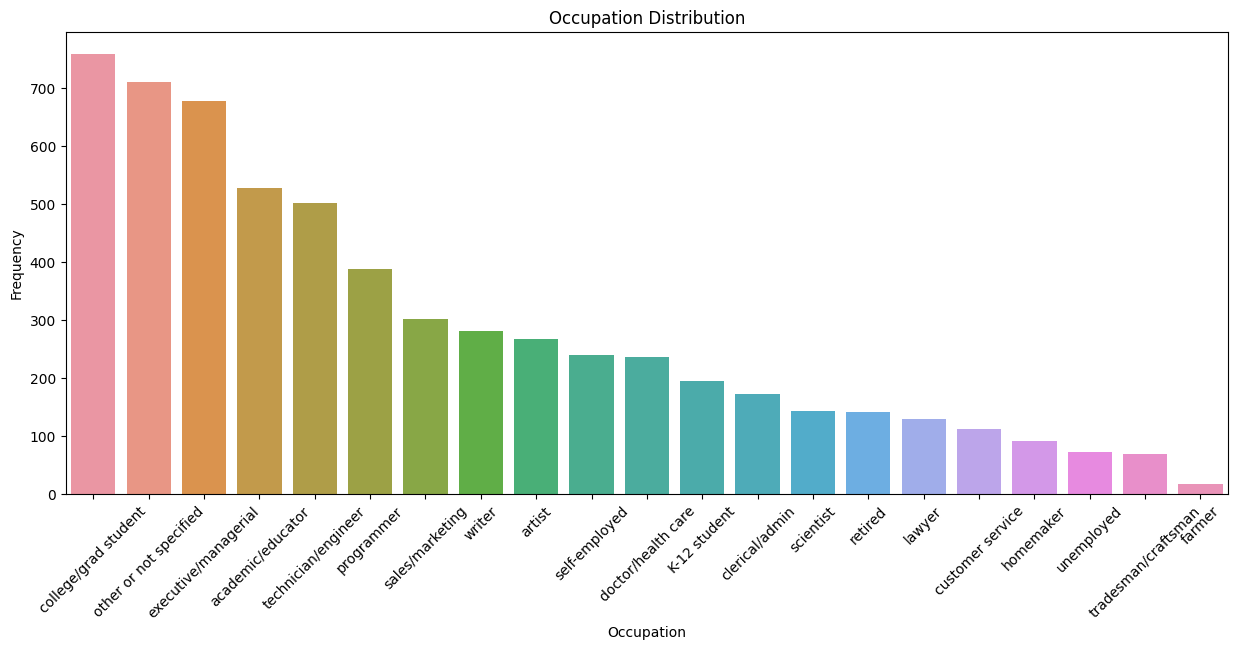

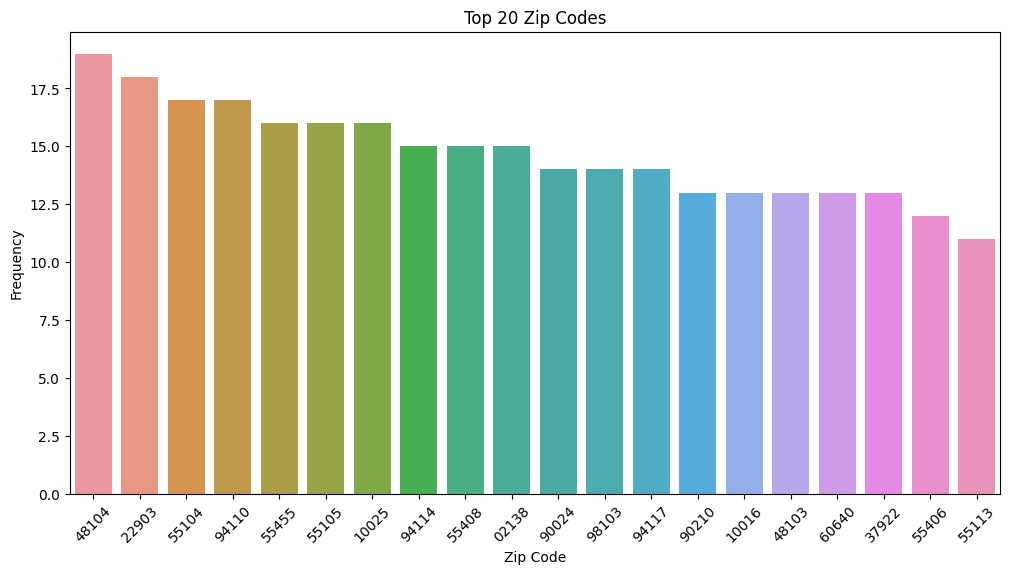

In [6]:
# Gender 분포
gender_counts = users_df['gender'].value_counts()
gender_colors = ['skyblue', 'pink']
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=gender_colors)
plt.title('Gender Distribution')
plt.show()

# Age 분포
age_mapping = {
    1: '18 and under',
    18: '18-24',
    25: '25-34',
    35: '35-44',
    45: '45-49',
    50: '50-55',
    56: '56+'
}
users_df['agegroup'] = users_df['age'].map(age_mapping)
age_group_counts = users_df['agegroup'].value_counts()

# age_mapping의 키 값으로 정렬
sorted_age_groups = sorted(age_mapping.values(), key=lambda x: list(age_mapping.values()).index(x))
age_group_counts = age_group_counts.reindex(sorted_age_groups)

plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# 연령별 성별 분포
plt.figure(figsize=(10, 6))
sns.countplot(data=users_df, x='agegroup', hue='gender', order=sorted_age_groups, palette=gender_colors)  # order 지정
plt.title('Gender Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

# Occupation 분포
occupation_mapping = {
    0: 'other or not specified',
    1: 'academic/educator',
    2: 'artist',
    3: 'clerical/admin',
    4: 'college/grad student',
    5: 'customer service',
    6: 'doctor/health care',
    7: 'executive/managerial',
    8: 'farmer',
    9: 'homemaker',
    10: 'K-12 student',
    11: 'lawyer',
    12: 'programmer',
    13: 'retired',
    14: 'sales/marketing',
    15: 'scientist',
    16: 'self-employed',
    17: 'technician/engineer',
    18: 'tradesman/craftsman',
    19: 'unemployed',
    20: 'writer'
}
users_df['OccupationLabel'] = users_df['Occupation'].map(occupation_mapping)
occupation_counts = users_df['OccupationLabel'].value_counts()
plt.figure(figsize=(15, 6))
sns.barplot(x=occupation_counts.index, y=occupation_counts.values)
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()